Test MSE: 0.0032


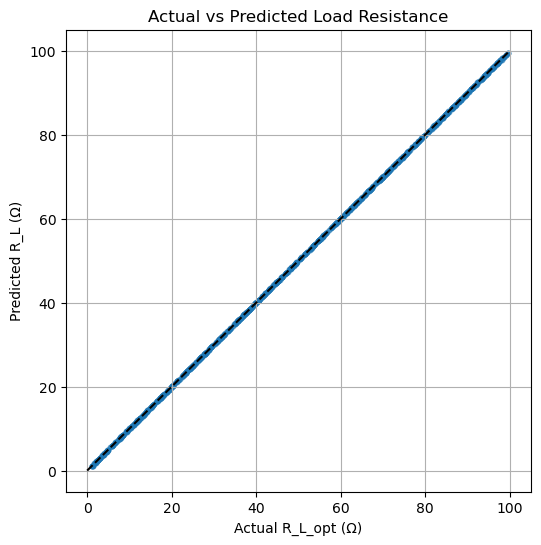

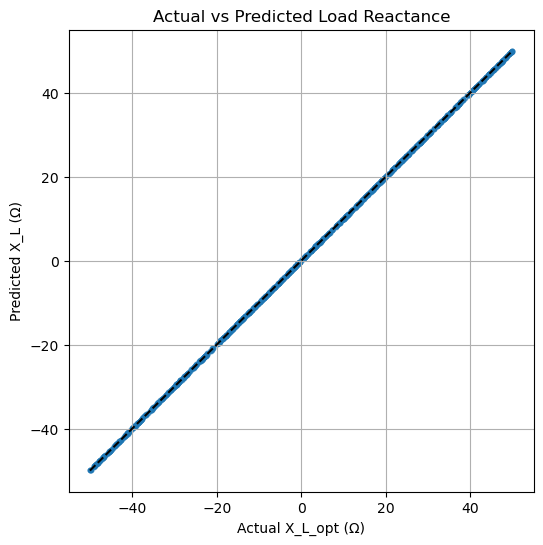

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error

# 1. Generate synthetic Thevenin data
num_samples = 5000
R_th = np.random.uniform(1, 100, num_samples)     # Thevenin resistance (ohms)
X_th = np.random.uniform(-50, 50, num_samples)    # Thevenin reactance (ohms)

# 2. Compute optimal load (conjugate match)
R_L_opt = R_th.copy()
X_L_opt = -X_th.copy()

# 3. Prepare input (features) and target arrays
X = np.vstack([R_th, X_th]).T   # shape (n_samples, 2)
y = np.vstack([R_L_opt, X_L_opt]).T  # shape (n_samples, 2)

# 4. Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Define and train the MLP regressor
mlp = MLPRegressor(hidden_layer_sizes=(64, 64),
                   activation='relu',
                   solver='adam',
                   max_iter=300,
                   random_state=42)
mlp.fit(X_train, y_train)

# 6. Evaluate on test set
y_pred = mlp.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Test MSE: {mse:.4f}")

# 7. Plot Actual vs Predicted for R_L
plt.figure(figsize=(6, 6))
plt.scatter(y_test[:, 0], y_pred[:, 0], s=10, alpha=0.6)
plt.plot([0, 100], [0, 100], 'k--')
plt.xlabel("Actual R_L_opt (Ω)")
plt.ylabel("Predicted R_L (Ω)")
plt.title("Actual vs Predicted Load Resistance")
plt.grid(True)
plt.show()

# 8. Plot Actual vs Predicted for X_L
plt.figure(figsize=(6, 6))
plt.scatter(y_test[:, 1], y_pred[:, 1], s=10, alpha=0.6)
plt.plot([-50, 50], [-50, 50], 'k--')
plt.xlabel("Actual X_L_opt (Ω)")
plt.ylabel("Predicted X_L (Ω)")
plt.title("Actual vs Predicted Load Reactance")
plt.grid(True)
plt.show()

# 9. Next steps (comments for learning purposes):
# - Replace synthetic data with component sweeps: run your simulator (e.g., QUCS/openEMS)
#   to collect (C1, L, C2) -> Z_in datasets.
# - Train a surrogate model: f(settings) -> Z_in (real and imaginary parts).
# - Define a loss function (e.g., |Z_in - Z_target|) and optimize settings using MLP surrogate.
# - Optionally train an inverse network: Z_target -> settings for direct matching.
